# 初始設定和資料

## 載入套件.資料集

In [1]:
# 載入常用套件、設定

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTE # pip install imbalanced-learn
from imblearn.pipeline import make_pipeline, Pipeline
from collections import Counter
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import pickle



import warnings
warnings.filterwarnings("ignore")


#pd.set_option('display.max_rows', 60) # 最多顯示60筆
#pd.set_option('display.max_columns', 200) # 顯示所有欄位，第2個參數可指定顯示幾個欄位。None是全部顯示


plt.rcParams['figure.figsize'] = (10,7) # 自行調整大小
#plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
mpl.rcParams["font.sans-serif"] = ["SimHei"] # 使用黑體，中文用
mpl.rcParams["axes.unicode_minus"] = False # 可以顯示負號

In [2]:
# 載入檔案，看前5筆

import pandas as pd

#df = pd.read_csv('sample_data/mnist_test.csv') # google colab上傳資料檔，可統一放在sample_data目錄(google內建)
#df1 = pd.read_csv('application_data.csv')
#df = pd.read_csv('creditV2-2.csv') # 53欄
#df = pd.read_csv('creditV3-2.csv')
#df = pd.read_csv('creditV3-3.csv') # 3-3為集成版
df = pd.read_csv('creditV3-4-fixed.csv') # 3-4為集成版

#df2 = df.copy()
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,...,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,YEARS_EMP_BINNED,CREDIT_ANNUITY_PRICE,CHANGE_REGISTRATION,BIRTH_EMPLOYED_INCOME,HOUSE_AVG,AMT_REQ
0,1,0.2,0.8,0.8,0.800000,0.8,0.800000,0.716812,0.432112,0.353793,...,0.404782,0.8,0.2,0.2,0.200000,0.65,0.65,0.65,0.8,0.200000
1,0,0.8,0.8,0.8,0.800000,0.8,0.800000,0.716812,0.432112,0.280938,...,0.200000,0.2,0.2,0.2,0.200000,0.20,0.65,0.35,0.2,0.200000
2,0,0.2,0.8,0.8,0.752469,0.5,0.800000,0.458406,0.432112,0.494957,...,0.200000,0.8,0.2,0.2,0.200000,0.65,0.65,0.35,0.2,0.200000
3,0,0.2,0.2,0.8,0.800000,0.3,0.458406,0.458406,0.432112,0.494957,...,0.200000,0.2,0.2,0.8,0.373439,0.35,0.80,0.65,0.2,0.609564
4,0,0.2,0.8,0.8,0.800000,0.5,0.458406,0.458406,0.432112,0.223529,...,0.200000,0.8,0.2,0.2,0.200000,0.80,0.65,0.50,0.2,0.200000


## 資料集資訊

In [3]:
df.shape

(246106, 36)

In [4]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'YEARS_EMP_BINNED', 'CREDIT_ANNUITY_PRICE', 'CHANGE_REGISTRATION',
       'BIRTH_EMPLOYED_INCOME', 'HOUSE_AVG', 'AMT_REQ'],
      dtype='object')

In [5]:
# label coding過後，object已轉成數值欄位

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246106 entries, 0 to 246105
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      246106 non-null  int64  
 1   NAME_CONTRACT_TYPE          246106 non-null  float64
 2   CODE_GENDER                 246106 non-null  float64
 3   FLAG_OWN_REALTY             246106 non-null  float64
 4   NAME_TYPE_SUITE             246106 non-null  float64
 5   NAME_INCOME_TYPE            246106 non-null  float64
 6   NAME_EDUCATION_TYPE         246106 non-null  float64
 7   NAME_FAMILY_STATUS          246106 non-null  float64
 8   NAME_HOUSING_TYPE           246106 non-null  float64
 9   REGION_POPULATION_RELATIVE  246106 non-null  float64
 10  OWN_CAR_AGE                 246106 non-null  float64
 11  FLAG_WORK_PHONE             246106 non-null  float64
 12  FLAG_PHONE                  246106 non-null  float64
 13  FLAG_EMAIL    

## 類別欄位

In [6]:
col_cat = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [7]:
# 檢視類別欄位編碼後的情況

df.NAME_TYPE_SUITE.value_counts()

0.800000    200950
0.413724     31702
0.752469      8749
0.200000      2541
0.696252      1319
0.627449       637
0.538745       208
Name: NAME_TYPE_SUITE, dtype: int64

## 說明

1. DNN、K近鄰、隨機森林3模型整個跑下來約13分鐘
2. 上+下採樣對信用違約資料集無影響

In [8]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'YEARS_EMP_BINNED', 'CREDIT_ANNUITY_PRICE', 'CHANGE_REGISTRATION',
       'BIRTH_EMPLOYED_INCOME', 'HOUSE_AVG', 'AMT_REQ'],
      dtype='object')

# 分割資料和採樣.特徵工程


先切分資料，再對訓練資料採樣:
* 重新採樣的目的是讓模型產生鑑別度，而不是讓模型學習錯誤資訊。若先採樣才切分，可能使測試資料偏離了原資料，
  導致模型學習到一堆雜訊。

## 上採樣

In [9]:
X = df.drop(['TARGET'],axis = 1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 0)

In [10]:
print('採樣前, 訓練資料集狀況:',Counter(y_train))
oversample = RandomOverSampler(sampling_strategy='minority')

X_train1, y_train1 = oversample.fit_resample(X_train, y_train)
print('採樣後, 訓練資料集狀況:',Counter(y_train1))

採樣前, 訓練資料集狀況: Counter({0: 158944, 1: 13330})
採樣後, 訓練資料集狀況: Counter({0: 158944, 1: 158944})


## ◎上採樣+下採樣(不用)

* 上採樣的效果明顯比下採樣還要來的好，但也存在一個缺點，因為我們會大量的對少數樣本附近進行複製，很可能合成出
  `一些雜訊`或是`靠近正樣本`的資料，而下採樣的方法中有一個叫做`Tomek Link`的方法，他的概念是能刪除一些
   邊界辨識度不高的樣本，因此我們可以先採用上採樣合成樣本後，再進行下採樣，把一些是雜訊的資料點剃除.
* 對本資料集無影響，不用。

In [10]:
# from imblearn.under_sampling import TomekLinks

# X_train2, y_train2 = TomekLinks().fit_resample(X_train1, y_train1)

## ◎SelectKBest特徵工程(已抓圖.停用)

In [11]:
# #col = ['TARGET','NAME_EDUCATION_TYPE', 'EXT_SOURCE_3',  'EXT_SOURCE_2','EXT_SOURCE_1']

# col = ['TARGET','NAME_EDUCATION_TYPE', 'FLAG_DOCUMENT_3','REGION_RATING_CLIENT', 'EXT_SOURCE_1', 
#        'EXT_SOURCE_3',  'EXT_SOURCE_2']

# df = df[col]

# # X = df.drop(['TARGET'],axis = 1)
# # y = df['TARGET']
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 0)

## ★特徵工程Wrapper法



### 訓練(sklearn的RFE法)

In [12]:
# 各種模型  XGBClassifier(9分), RandomForestClassifie(50分), DecisionTreeClassifier, LGBMClassifier, 
# 各種模型：KNeighborsClassifier(KNN), MLPClassifier(DNN) , GaussianNB(無法跑)

#lin_reg = LogisticRegression(random_state=1) # 改用xgboost試試
lin_reg = XGBClassifier(random_state=1) # 9分

# 選擇5個變量：可以更改並在模型中檢查其準確性
rfe_mod = RFE(lin_reg,step=1)  # RFECV(lin_reg, step=1, cv=5) 
X = X_train1
y = y_train1
names=pd.DataFrame(X_train1.columns)
myvalues=rfe_mod.fit(X,y) #to fit
myvalues.support_  #The mask of selected features.
myvalues.ranking_  #特徵排名，使得ranking_ [i]對應於第i個特徵的排名位置。選定的（即最佳估計）特徵被分配為等級1.
rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame

scored=pd.concat([names,rankings], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score']).head(35)

,Feature,Score
0,NAME_CONTRACT_TYPE,1
33,HOUSE_AVG,1
22,EXT_SOURCE_2,1
23,EXT_SOURCE_3,1
25,DEF_60_CNT_SOCIAL_CIRCLE,1
26,FLAG_DOCUMENT_3,1
11,FLAG_PHONE,1
29,YEARS_EMP_BINNED,1
21,EXT_SOURCE_1,1
9,OWN_CAR_AGE,1


In [13]:
# 選擇排名1的欄位

ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#選擇最重要(Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)
most_important['Rank'].count()

                       Feature  Rank
0           NAME_CONTRACT_TYPE     1
1                  CODE_GENDER     1
4             NAME_INCOME_TYPE     1
5          NAME_EDUCATION_TYPE     1
7            NAME_HOUSING_TYPE     1
8   REGION_POPULATION_RELATIVE     1
9                  OWN_CAR_AGE     1
11                  FLAG_PHONE     1
20           ORGANIZATION_TYPE     1
21                EXT_SOURCE_1     1
22                EXT_SOURCE_2     1
23                EXT_SOURCE_3     1
25    DEF_60_CNT_SOCIAL_CIRCLE     1
26             FLAG_DOCUMENT_3     1
29            YEARS_EMP_BINNED     1
30        CREDIT_ANNUITY_PRICE     1
33                   HOUSE_AVG     1


17

In [14]:
# 訓練

# Filter:指定變數
# lrX = X_train[['Number_pregnant','Glucose_concentration','BMI','Pedigree']]
# lrX = X_test[['Number_pregnant','Glucose_concentration','BMI','Pedigree']]
# lry = y_test
# y_pred=lin_reg.fit(lrX)
lin_reg.fit(X_train1,y_train1) 
lin_reg.score(X_train1,y_train1)
#lin_reg.coef_

0.7731150593919871

### 測試結果

In [15]:
# Filter:指定變數
# lrX = X_test[['Number_pregnant','Glucose_concentration','BMI','Pedigree']]
# lry = y_test
# y_pred=lin_reg.predict(lrX)
y_pred=lin_reg.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
# y_pred =rfe_mod.predict(lrX)
accuracy = accuracy_score(y_test, y_pred)
print("Logic Regression Accuracy: %0.1f%% " % (accuracy * 100))

Logic Regression Accuracy: 73.0% 


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.83     68051
           1       0.17      0.61      0.26      5781

    accuracy                           0.73     73832
   macro avg       0.56      0.67      0.55     73832
weighted avg       0.89      0.73      0.79     73832



In [18]:
print(confusion_matrix(y_test,y_pred))

[[50376 17675]
 [ 2283  3498]]


# 抓出模型的分數，選擇特徵最高的欄位

In [19]:
# X = df.drop(['TARGET'],axis = 1)
# y = df['TARGET']
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.3, random_state = 0)

In [20]:
# from sklearn.feature_selection import SelectKBest,mutual_info_classif

# bestfeatures = SelectKBest(score_func=mutual_info_classif, k=15)
# fit = bestfeatures.fit(X,y,)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns) 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Feature','Score'] 
# print(featureScores.nlargest(15,'Score'))


In [21]:
# df_rst = pd.DataFrame(featureScores.nlargest(15,'Score'))
# print(list(df_rst['Feature']))

In [22]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'YEARS_EMP_BINNED', 'CREDIT_ANNUITY_PRICE', 'CHANGE_REGISTRATION',
       'BIRTH_EMPLOYED_INCOME', 'HOUSE_AVG', 'AMT_REQ'],
      dtype='object')

# pycaret特徵工程

## 設定和建立分類器

In [23]:
# 以分類後的35個欄位來做

from pycaret.classification import *

train1_df =pd.concat([X_train1,y_train1],axis=1)
classifier = setup(data=df,preprocess = False, target = 'TARGET',silent=True)

,Description,Value
0,session_id,2422
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(246106, 36)"
5,Missing Values,False
6,Numeric Features,23
7,Categorical Features,12
8,Transformed Train Set,"(172274, 35)"
9,Transformed Test Set,"(73832, 35)"


In [24]:
dt = create_model('dt')
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9220,0.7255,0.0045,0.5000,0.0089,0.0075,0.0416
1,0.9221,0.7138,0.0037,0.5556,0.0074,0.0064,0.0407
2,0.9225,0.7152,0.0082,0.7333,0.0162,0.0145,0.0722
3,0.9219,0.7252,0.0060,0.4211,0.0118,0.0096,0.0425
4,0.9222,0.7172,0.0052,0.5385,0.0103,0.0089,0.0472
5,0.9223,0.7306,0.0067,0.6429,0.0133,0.0117,0.0601
6,0.9223,0.7260,0.0052,0.7000,0.0104,0.0092,0.0559
7,0.9220,0.7107,0.0052,0.4375,0.0103,0.0085,0.0409
8,0.9223,0.7204,0.0052,0.7000,0.0104,0.0092,0.0559


In [25]:
tuned_dt = tune_model(dt, optimize = 'AUC')
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6729,0.7392,0.6850,0.1500,0.2462,0.1356,0.1999
1,0.6771,0.7355,0.6739,0.1501,0.2455,0.1352,0.1974
2,0.6758,0.7315,0.6781,0.1501,0.2458,0.1355,0.1985
3,0.6781,0.7387,0.6788,0.1512,0.2473,0.1374,0.2005
4,0.6753,0.7270,0.6639,0.1477,0.2416,0.1308,0.1911
5,0.6799,0.7464,0.6863,0.1531,0.2504,0.1410,0.2056
6,0.6756,0.7333,0.6617,0.1474,0.2411,0.1303,0.1902
7,0.6779,0.7272,0.6595,0.1481,0.2419,0.1314,0.1909
8,0.6785,0.7405,0.6841,0.1522,0.2489,0.1392,0.2034


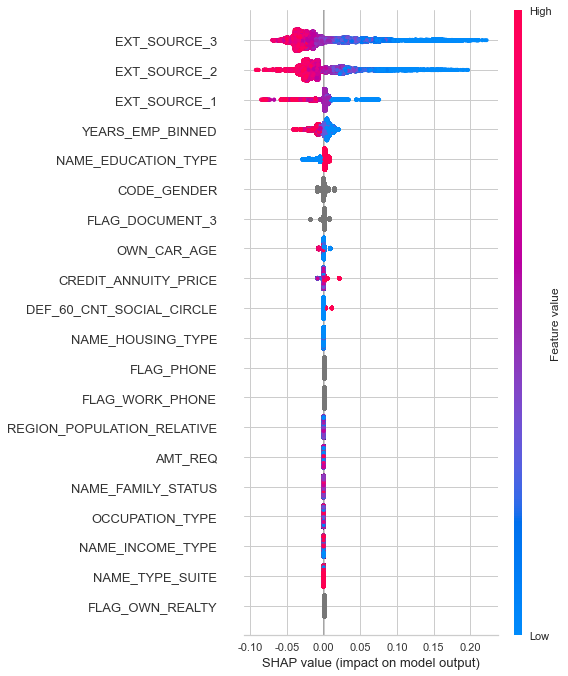

In [26]:
with plt.rc_context({'figure.facecolor':'grey'}):
    interpret_model(tuned_dt)

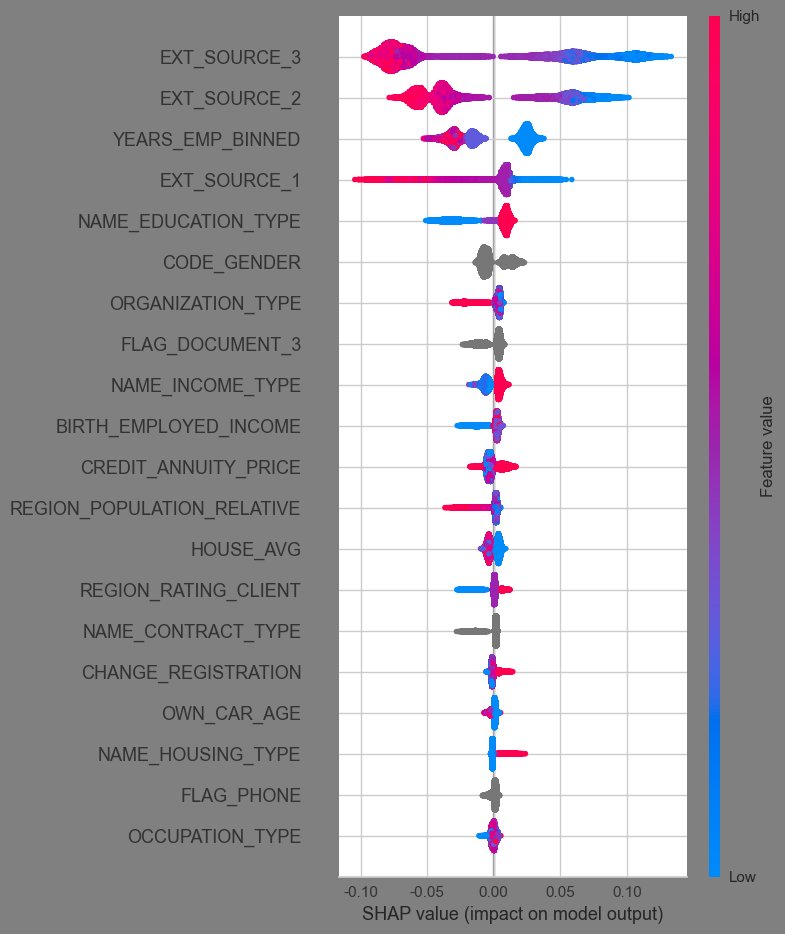

In [27]:
# 優化

with plt.rc_context({'figure.facecolor':'grey'}):
    interpret_model(tuned_rf)

##  挑出重要的特徵

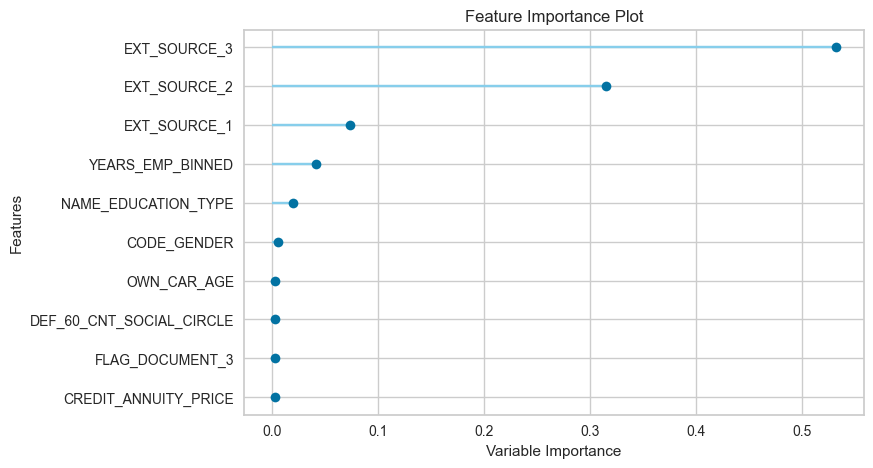

In [28]:
# 挑出重要的特徵　for dt

plot_model(tuned_dt, plot='feature')

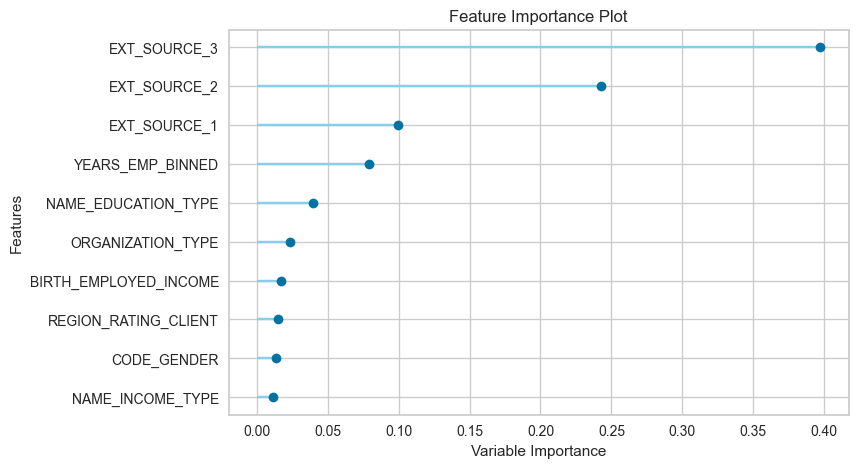

In [29]:
plot_model(tuned_rf, plot='feature')

## 畫出模型分布

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(tuned_rf, plot='boundary')

In [ ]:
# 此功能似有bug

plt.figure(figsize=(8, 8))
with plt.rc_context({'figure.facecolor':'black','text.color':'black'}):
    plot_model(tuned_dt, plot='tree')

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(tuned_dt, plot='learning')

In [ ]:
# 分類報告

plt.figure(figsize=(8, 8))
plot_model(tuned_dt, plot='class_report')

# DNN神經網路

說明：
*  觀察前3個參數(最重要。隱藏層設定、作用函數、學習次數)和其他參數調整後的變化

圖：
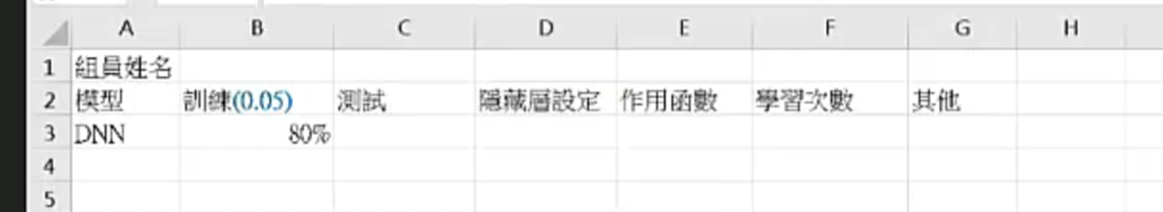

## **Sckit-Learn DNN**

* hidden_layer_sizes=(50, 30)，表示有兩層隱藏層，第一層隱藏層有50個神經元，第二層有30個神經元。 
* tuple，length = n_layers - 2，默认值（100. 100個神經元，只有1層）。第i个元素表示第i個隐藏层中的神经元数量。
* https://blog.csdn.net/weixin_38278334/article/details/83023958

In [ ]:
# 老師預設參數

from sklearn.neural_network import MLPClassifier

dnn = MLPClassifier(hidden_layer_sizes=(100),  #預設值1層,數目100
         activation='logistic',  #{'identity'無，'logistic'為sigmoid，'tanh'，'relu'}，預設='relu'
         solver='sgd',   #{'lbfgs'牛頓，'sgd'隨機梯度，'adam'隨機梯度優化}，預設='adam'
         batch_size='auto',  #'auto'為min(200～樣本數)
         learning_rate='constant',  #constant固定'，'invscaling隨著時間遞減'，'adaptive誤差減少時不改變'}，預設 ='constant' 
         learning_rate_init=0.001, #優化器為sgd、adam使用
         power_t=0.5,     # 優化器為sgd，則可以設定強化學習率   
         max_iter=200,    #訓練次數
         shuffle=True,    #隨機設定權重
         random_state=1,   #隨機的基礎值
         momentum=0.9,    #動量
         alpha=0.001)     # L2正規化 數字愈大降低過擬合、數字愈小修正高誤差

In [ ]:
# 跑超久, 近20分！
# dnn = MLPClassifier()

In [ ]:
# 數十分

# dnn = MLPClassifier(hidden_layer_sizes=(5,5), activation='logistic', max_iter=400)

## ★訓練

In [ ]:
%%time
# v3.3csv +16個欄位跑2分

dnn_model = dnn.fit(X_train1, y_train1)

with open('dnn_model.pickle', 'wb') as fw:
    pickle.dump(dnn_model, fw)

rst = dnn.score(X_train1,y_train1)
print("訓練評分: %0.4f%% " % (rst * 100))

## 測試結果

In [ ]:
# y預測值

y_pred = dnn.predict(X_test)
y_pred

In [ ]:
# 準確度accuracy(看整體)

accuracy = accuracy_score(y_test, y_pred)
print("模型準確度(正確率, Accuracy): %0.4f%% " % (accuracy * 100))

In [ ]:
# 分類報告
 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

In [ ]:
# 混淆矩陣

print(confusion_matrix(y_test,y_pred))

## 門檻值

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)


In [ ]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errvalue=abs((ytest-y_pred)/ytest)
errvalue

In [ ]:
threshold=0.01  #門檻值
for i in range(len(errvalue)):
    if errvalue[i]<0.01:           
        count=count+1
print("通過門檻筆數",count)
print("通過門檻百分比",count/len(errvalue))

# K近鄰法

## 訓練

In [ ]:
%%time 

# 跑18分多 (先前只跑4分)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1, y_train1)
rst = knn.score(X_train1,y_train1)
print("訓練評分: %0.4f%% " % (rst * 100))

## 測試結果

In [ ]:
%%time
# y預測值

y_pred = knn.predict(X_test)
y_pred

In [ ]:

# 準確度accuracy(看整體)

accuracy = accuracy_score(y_test, y_pred)
print("模型準確度(正確率, Accuracy): %0.4f%% " % (accuracy * 100))

In [ ]:
# 分類報告

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

In [ ]:
# 混淆矩陣

print(confusion_matrix(y_test,y_pred))

## 門檻值

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)


In [ ]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errvalue=abs((ytest-y_pred)/ytest)
errvalue

In [ ]:
threshold=0.01  #門檻值
for i in range(len(errvalue)):
    if errvalue[i]<0.01:           
        count=count+1
print("通過門檻筆數",count)
print("通過門檻百分比",count/len(errvalue))

# 隨機森林(集成)

圖1：抽樣前：
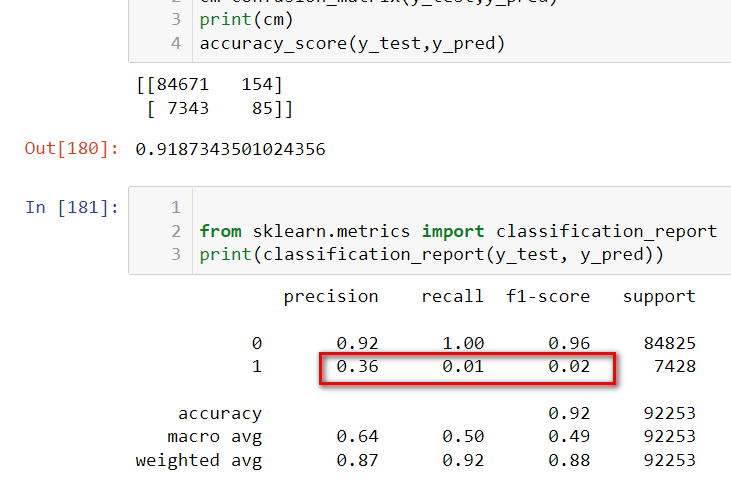

---
圖2：抽樣後, 1的部分提升
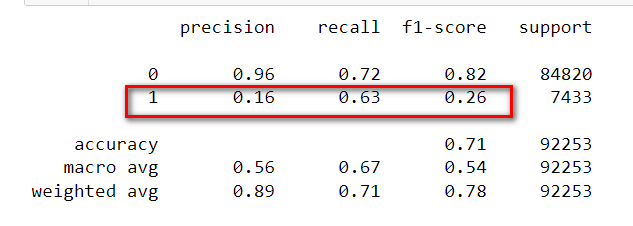

## ★訓練

In [ ]:
%%time

from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators = 10, random_state = 0) 原始
rf = RandomForestClassifier(n_estimators = 35, criterion='gini', max_depth=10, random_state = 1)

rf_model = rf.fit(X_train1, y_train1)

with open('rf_model.pickle', 'wb') as fw:
    pickle.dump(rf_model, fw)

rst = rf.score(X_train1,y_train1)
print("訓練評分: %0.4f%% " % (rst * 100))

## 測試結果

In [ ]:
# 準確度accuracy(看整體)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("模型準確度(正確率, Accuracy): %0.4f%% " % (accuracy * 100))

In [ ]:
# 分類報告
 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

In [ ]:
# 混淆矩陣

print(confusion_matrix(y_test,y_pred))

## 門檻值

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)


In [ ]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errvalue=abs((ytest-y_pred)/ytest)
errvalue

In [ ]:
threshold=0.01  #門檻值
for i in range(len(errvalue)):
    if errvalue[i]<0.01:           
        count=count+1
print("通過門檻筆數",count)
print("通過門檻百分比",count/len(errvalue))

# 貝氏分類器

圖：creditV1: 目前最高的召回率0.63
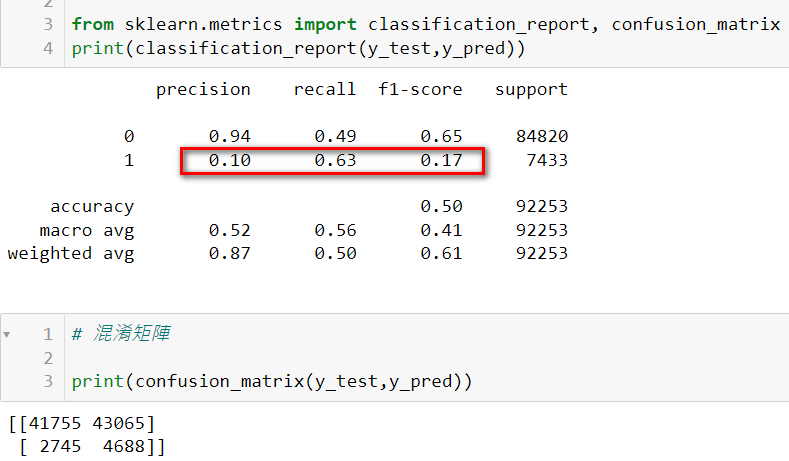

## GaussianNB

### 訓練

In [101]:
%%time
# 較快速

from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train1, y_train1)
rst = GNB.score(X_train1,y_train1)
print("訓練評分: %0.4f%% " % (rst * 100))



訓練評分: 65.1701% 
Wall time: 566 ms


### 測試結果

In [102]:
# 準確度accuracy(看整體)
y_pred = GNB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("模型準確度(正確率, Accuracy): %0.4f%% " % (accuracy * 100))

模型準確度(正確率, Accuracy): 64.1389% 


In [103]:
# 分類報告
 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77     68051
           1       0.14      0.67      0.23      5781

    accuracy                           0.64     73832
   macro avg       0.55      0.66      0.50     73832
weighted avg       0.89      0.64      0.72     73832



In [104]:
# 混淆矩陣

print(confusion_matrix(y_test,y_pred))

[[43474 24577]
 [ 1900  3881]]


### 門檻值

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)


MSE= 0.358611442193087
RMSE= 0.5988417505427348
MAE= 0.358611442193087
R2: -3.969079299787756


In [106]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errvalue=abs((ytest-y_pred)/ytest)
errvalue

array([nan, nan, nan, ...,  0., inf, inf])

In [107]:
threshold=0.01  #門檻值
for i in range(len(errvalue)):
    if errvalue[i]<0.01:           
        count=count+1
print("通過門檻筆數",count)
print("通過門檻百分比",count/len(errvalue))

通過門檻筆數 3881
通過門檻百分比 0.05256528334597464


## 不用CategoricalNB(類樸素貝葉斯)

### 訓練

In [108]:
# from sklearn.naive_bayes import CategoricalNB

# Cnb = CategoricalNB()
# Cnb.fit(X_train1, y_train1)
# rst = Cnb.score(X_train1,y_train1)
# print("訓練評分: %0.4f%% " % (rst * 100))

### 測試

In [109]:
# # y預測值

# y_pred = Cnb.predict(X_test)
# y_pred

In [110]:
# # 準確度accuracy(看整體)

# accuracy = accuracy_score(y_test, y_pred)
# print("模型準確度(正確率, Accuracy): %0.4f%% " % (accuracy * 100))

In [111]:
# # 分類報告
 
# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(y_test,y_pred))

In [112]:
# # 混淆矩陣

# print(confusion_matrix(y_test,y_pred))

### 門檻值

In [113]:
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from math import sqrt
# import numpy as np

# MSE = mean_squared_error(y_test, y_pred)
# print('MSE=',MSE)
# RMSE =np.sqrt(MSE)
# print('RMSE=',RMSE)
# MAE= mean_absolute_error(y_test, y_pred)
# print('MAE=',MAE)

# R2=1-MSE/np.var(y_test)
# print("R2:", R2)


In [114]:
# ytest = []
# for value in y_test:
#     ytest.append(value)
# count=0
# errvalue=abs((ytest-y_pred)/ytest)
# errvalue

In [115]:
# threshold=0.01  #門檻值
# for i in range(len(errvalue)):
#     if errvalue[i]<0.01:           
#         count=count+1
# print("通過門檻筆數",count)
# print("通過門檻百分比",count/len(errvalue))

#  ★XGBoost(梯度提升法)

## ★訓練

In [116]:
# from xgboost.sklearn import XGBClassifier
# xgbc = XGBClassifier(        
#         n_estimators=100,     #樹的個數
#         learning_rate= 0.3,    # 如同學習率 
#         max_depth=6,       # 構建樹的深度，越大越容易過擬合    
#         subsample=1,         # 隨機取樣訓練樣本 訓練例項的子取樣比
#         gamma=0,         # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
#         reg_lambda=1,          # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
#         max_delta_step=0,        #最大增量步長，我們允許每個樹的權重估計。
#         colsample_bytree=1,         # 生成樹時進行的列取樣 
#         min_child_weight=1, 
#                      # 這個引數預設是 1，是每個葉子裡面 h 的和至少是多少，對正負樣本不均衡時的 0-1 分類而言
#                      # 假設 h 在 0.01 附近，min_child_weight 為 1 意味著葉子節點中最少需要包含 100 個樣本。
#                      #這個引數非常影響結果，控制葉子節點中二階導的和的最小值，該引數值越小，越容易 overfitting。
#         seed=1000         #隨機種子
# #        reg_alpha=0,        # L1 正則項引數
#         #scale_pos_weight=1,        #如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
#         #objective= 'multi:softmax',         #多分類的問題 指定學習任務和相應的學習目標
#         #num_class=10,        # 類別數，多分類與 multisoftmax 並用
# #        silent=0 ,        # 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
# #        nthread=4,        # cpu 執行緒數 預設最大
#         #eval_metric= 'auc',
#         random_state=1
# )


In [117]:
%%time

from xgboost import XGBClassifier

XGB = XGBClassifier(random_state=1)

XGB_model = XGB.fit(X_train1, y_train1)

with open('XGB_model.pickle', 'wb') as fw:
    pickle.dump(XGB_model, fw)

rst = XGB.score(X_train1,y_train1)
print("訓練評分: %0.4f%% " % (rst * 100))

訓練評分: 76.9954% 
Wall time: 24.5 s


## 測試

In [118]:
y_pred = XGB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("模型準確度(正確率, Accuracy): %0.4f%% " % (accuracy * 100))

模型準確度(正確率, Accuracy): 73.2122% 


In [119]:
# 分類報告
 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84     68051
           1       0.17      0.61      0.26      5781

    accuracy                           0.73     73832
   macro avg       0.56      0.68      0.55     73832
weighted avg       0.90      0.73      0.79     73832



In [120]:
# 混淆矩陣

print(confusion_matrix(y_test,y_pred))

[[50524 17527]
 [ 2251  3530]]


## 門檻值

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)


MSE= 0.2678784266984505
RMSE= 0.5175697312425163
MAE= 0.2678784266984505
R2: -2.7118423685161552


In [122]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errvalue=abs((ytest-y_pred)/ytest)
errvalue

array([nan, nan, nan, ...,  0., inf, inf])

In [123]:
threshold=0.01  #門檻值
for i in range(len(errvalue)):
    if errvalue[i]<0.01:           
        count=count+1
print("通過門檻筆數",count)
print("通過門檻百分比",count/len(errvalue))

通過門檻筆數 3530
通過門檻百分比 0.047811247155704846


## 網格搜尋

### 網格訓練

In [124]:
# 預設做5個交叉驗證*2*2*2*2 =80次,大約40分

from sklearn.model_selection import GridSearchCV

# params = { 'max_depth': [3,6,10],
#            'learning_rate': [0.01, 0.05, 0.1],
#            'n_estimators': [100, 500, 1000],
#            'colsample_bytree': [0.3, 0.7]}


params = { 'max_depth': [3,6],  #   每顆樹的最大深度
           'learning_rate': [0.01, 0.1], # 學習率
           'n_estimators': [100, 500],     # 樹的數量
           'colsample_bytree': [0.3, 0.7]} # 每次建樹可以使用多少比例的features
          
XGB = XGBClassifier(random_state=1)
grid_search = GridSearchCV(estimator=XGB, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

grid_search.fit(X_train1, y_train1)
bestimator = grid_search.best_estimator_
ypred = bestimator.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
# from imblearn.over_sampling import RandomOverSampler,SMOTE # pip install imbalanced-learn
# from imblearn.pipeline import make_pipeline, Pipeline
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, RepeatedStratifiedKFold
# from xgboost import XGBClassifier

# XGB = XGBClassifier()

# #kf = KFold(n_splits=10, random_state=1, shuffle=True)
# kf = KFold(n_splits=3, random_state=1, shuffle=True) # 使用交叉驗證，先設少一點,設為3

# sampler = SMOTE(random_state=1) # 使用SMOTE抽樣

# # 4*5*4=80種組合
# # rs_parameters = {
# #     'lgbmclassifier__learning_rate': [0.005,0.01,0.001,0.05],
# #     'lgbmclassifier__n_estimators': [20,40,60,80,100],
# #     'lgbmclassifier__num_leaves': [6,8,12,16]
# #     }

# #  2*2*1*3=12種組合 (最後一個3是n_split)
# params = {
#     'max_depth': [6,10],
#     'learning_rate': [0.01, 0.001],
#     'n_estimators': [100,500]
    
#     }


# # 串聯成工作流
# smp_pipeline = make_pipeline(sampler, XGB) #  第2個參數是前面定義的lgb分類器名稱(不同模型會有不同名稱)


# grid_search = GridSearchCV(estimator=smp_pipeline,
#                          param_grid=params,
#                          scoring='roc_auc',
#                          verbose=True
#                         )


# grid_search.fit(X_train1, y_train1)
# bestimator = grid_search.best_estimator_
# ypred = bestimator.predict(X_test)

In [ ]:
# 訓練準確率

XGB_score = bestimator.score(X_train1, y_train1)
print('XGB訓練分數:',(XGB_score))

In [ ]:
# 測試準確率

XGBtest_score=bestimator.score(X_test,y_test)
print('XGB測試分數:', XGBtest_score)

In [ ]:
print(classification_report(y_test,ypred))
print(confusion_matrix(y_test,ypred))

### 最佳參數

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

# ExtraTrees集成

## 訓練

In [ ]:
%%time

from sklearn.ensemble import ExtraTreesClassifier

# 深度、樹的數目、gini或entropy
#ETreec = ExtraTreesClassifier(max_depth=5,n_estimators=100,criterion='gini', random_state=1)
ETreec = ExtraTreesClassifier(max_depth=7,n_estimators=1000,criterion='gini', random_state=1)
ETreec.fit(X_train, y_train)
ETree_pred=ETreec.predict(X_test)
#print(ETree_pred)



In [ ]:
# 訓練

ETreetrain_score=ETreec.score(X_train, y_train)
print("訓練評分: %0.4f%% " % (ETreetrain_score * 100))


## 測試

In [ ]:
# 測試

ETreetest_score=ETreec.score(X_test,y_test)
#print('The Accuracy of ExtraTrees Classifier on testing set:', ETreetest_score)
print("測試準確度(正確率, Accuracy): %0.4f%% " % (ETreetest_score * 100))

In [ ]:
print(classification_report(y_test,ETree_pred))
print(confusion_matrix(y_test,ETree_pred))

## 門檻值

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, ETree_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, ETree_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)


In [ ]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errvalue=abs((ytest-ETree_pred)/ytest)
errvalue

In [ ]:
threshold=0.01  #門檻值
for i in range(len(errvalue)):
    if errvalue[i]<0.01:           
        count=count+1
print("通過門檻筆數",count)
print("通過門檻百分比",count/len(errvalue))

# AdaBoost

## 訓練

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# n_estimators預設50, learning_rate=1.0
# 有overfitting , 樹少一點500減到400，學習率少一些如0.2
AdaBoostc = AdaBoostClassifier(random_state=1,n_estimators=500, learning_rate=0.5,) 

In [ ]:
%%time

AdaBoostc.fit(X_train, y_train)
AdaBoostc_pred=AdaBoostc.predict(X_test)

AdaBoosttrain_score=AdaBoostc.score(X_train, y_train)
print("訓練評分: %0.4f%% " % (AdaBoosttrain_score * 100))
#print(AdaBoosttrain_score)
#print(AdaBoostc_pred)

## 測試

In [ ]:
AdaBoosttest_score=AdaBoostc.score(X_test,y_test)

print("The Accuracy of AdaBoost 測試正確率:" % (AdaBoosttest_score * 100))

In [ ]:
print(classification_report(y_test,AdaBoostc_pred))
print(confusion_matrix(y_test,AdaBoostc_pred))

## 門檻值

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, ETree_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, ETree_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)


In [ ]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errvalue=abs((ytest-ETree_pred)/ytest)
errvalue

In [ ]:
threshold=0.01  #門檻值
for i in range(len(errvalue)):
    if errvalue[i]<0.01:           
        count=count+1
print("通過門檻筆數",count)
print("通過門檻百分比",count/len(errvalue))

# ★LightGBM

LightGBM 是一個梯度提升框架，它使用基於樹的學習算法。它被設計為分佈式和高效的，具有以下優點:
1. 更快的訓練速度和更高的效率：Light GBM 使用基於直方圖的算法，即將連續特徵值分桶到離散的 bin 中，從而加快訓練過程。
2. 較低的內存使用：將連續值替換為離散的 bin，從而降低內存使用。
3. 比任何其他 boosting 算法更好的準確性：它通過遵循葉級分割方法而不是水平級方法生成更複雜的樹，這是實現更高準確性的
   主要因素。但是，它有時會導致過度擬合，這可以通過設置 max_depth 參數來避免。
4. 與大型數據集的兼容性：它能夠在大型數據集上表現同樣出色，並顯著減少訓練時間。
5. 支持平行學習

## python版GBM

### 訓練

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelBinarizer


In [ ]:
%%time

lgbmc = lgb.LGBMClassifier(random_state=1)

lgbmc_model = lgbmc.fit(X_train1, y_train1)
with open('lgbmc_model.pickle', 'wb') as fw:
    pickle.dump(lgbmc_model, fw)

y_pred=lgbmc.predict(X_test)
LGBMtrain_score=lgbmc.score(X_train1, y_train1)
print(LGBMtrain_score)

### 測試

In [ ]:
# 測試準確率

LGBMtest_score=lgbmc.score(X_test,y_test)
print('The Accuracy of LightGBM Classifier on testing set:', LGBMtest_score)

In [ ]:
# 分類報告和混淆矩陣

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

### ★網格搜尋(Grid Search)和pipeline

**說明：**
* 用於各種模型，選出最佳參數組合
* 會跑好個小時甚至1天，請用colab跑

**Pipeline:**
* 大多數機器學習應用不僅需要應用單個算法，而且還需要將許多不同的處理步驟和機器學習模型鏈接在一起，例如對數據進行縮放，
  然後手動合併特徵，再利用無監督學習來學習特徵。
* 爲了簡化構建變換和模型鏈的過程，Scikit-Learn提供了pipeline類，可以將`多個處理步驟合併爲單個Scikit-Learn估計器`。
* `pipeline類別本身具有fit、predict和score方法，其行爲與Scikit-Learn中的其他模型相同`
* 它可以將許多算法模型串聯起來，可以用於把多個estamitors級聯成一個estamitor,比如將特徵提取、標準化、分類等組織在一起
  形成一個典型的`機器學習問題工作流`
  
  
**交叉驗證(cross validiation)：**
* 將資料分成10等份，其中第1等分用來當作驗證的測試資料，其餘9份拿來訓練，下一輪我們繼續將第2等分拿來當作驗證的測試資料，
  其餘9份一樣拿來訓練，總共做10次。
* 藉著將10次的準確性(Accuracy)平均，而這個得到的平均值，準確度比較沒有偏差。

圖：
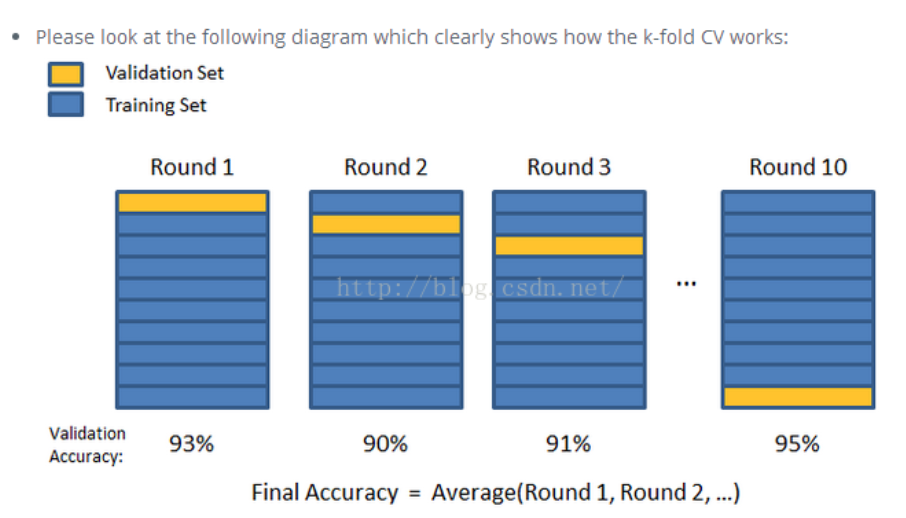


#### 網格訓練

In [ ]:
%%time

# 3分

from imblearn.over_sampling import RandomOverSampler,SMOTE # pip install imbalanced-learn
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, RepeatedStratifiedKFold

#kf = KFold(n_splits=10, random_state=1, shuffle=True)
kf = KFold(n_splits=3, random_state=1, shuffle=True) # 使用交叉驗證，先設少一點,設為3

sampler = SMOTE(random_state=1) # 使用SMOTE抽樣

#4*5*4=80種組合
# rs_parameters = {
#     'lgbmclassifier__learning_rate': [0.005,0.01,0.001,0.05],
#     'lgbmclassifier__n_estimators': [20,40,60,80,100],
#     'lgbmclassifier__num_leaves': [6,8,12,16]
#     }

# 2*2*1*3=12種組合 (最後一個3是n_split)
rs_parameters = {
    'lgbmclassifier__learning_rate': [0.01,0.001],
    'lgbmclassifier__n_estimators': [20,40],
    'lgbmclassifier__num_leaves': [6]
    }


# 串聯成工作流
smp_pipeline = make_pipeline(sampler, lgbmc) #  第2個參數是前面定義的lgb分類器名稱(不同模型會有不同名稱)


grid_search = GridSearchCV(smp_pipeline,
                         param_grid=rs_parameters,
                         cv=kf,  # 交叉驗證
                         scoring='roc_auc',
                         return_train_score=True,
                         n_jobs=-1, # 1是使用GPU
                         verbose=True
                        )


grid_search.fit(X_train1, y_train1)
bestimator = grid_search.best_estimator_
ypred = bestimator.predict(X_test)

In [ ]:
print('採樣後, 訓練資料集狀況:',Counter(y_train1))

In [ ]:
# 訓練準確率

lgbm_score = bestimator.score(X_train1, y_train1)
print(lgbm_score)

In [ ]:
# 測試準確率

lgbmtest_score=bestimator.score(X_test,y_test)
print('The Accuracy of LightGBM Classifier on testing set:', lgbmtest_score)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

#### 最佳參數

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

## sklearn版GBM

### 訓練

In [ ]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

LGBM = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=1)
LGBM.fit(X_train1, y_train1)
y_pred=LGBM.predict(X_test)

LGBMtrain_score=lgbmc.score(X_train1, y_train1)
print(LGBMtrain_score)

### 測試

In [ ]:
LGBMtest_score=lgbmc.score(X_test,y_test)
print('The Accuracy of LightGBM Classifier on testing set:', LGBMtest_score)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# CatBoost

In [ ]:
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

## 訓練

In [ ]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('ggplot') 
import seaborn as sns
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

CatBc = CatBoostClassifier(iterations=20, learning_rate=1, depth=2, loss_function='MultiClass', random_state=1)

CatBc.fit(X_train, y_train)
CatBtrain_score=CatBc.score(X_train, y_train)
print("訓練評分: %0.4f%% " % (CatBtrain_score * 100))


## 測試(留意正確率參數不同)

In [ ]:
y_pred=CatBc.predict(X_test)
#print(CatB_pred)

#CatBest_score=CatBc.score(X_test,y_test)

CatBest_score=CatBc.score(X_test,y_test) # 和之前模型不同。y_test, y_pred
print('CatBOOST Classifier 測試正確率:',CatBest_score)


In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# ★使用Keras自動編碼器給罕見事件分類

說明：
* 原理：以keras`全連接層自動編碼器`來構建`罕見事件分類器` 
* `編碼器(encoder)學習某一進程的隱含特性`。這些特性通常在一個降低的維度中。
* 解碼器(decoder)可以根據這些隱含特性重新創建原始數據。
* 評估reconstruction error,設定閾值

參考：
* 金融人才機器學習聯手出擊(P235)
* https://ppfocus.com/0/hi049ee86.html
* https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd

## 建構自動編碼器(autoencoder)

regularizers正規化(標準化)：
* 權重的值等於0將導致該神經元無法發揮作用，正則化透過添加人為的限制，對過於激活的神經元進行懲罰，讓他的值向0靠攏
*  你也可以對偏差或模型的輸出進行懲罰，你可以直接傳遞字串，或是引入Keras的regularizers模組，可以對預設值進行調整
* 具體的使用方式如下，有三個可用的選項l1、l2、l1_l2，針對哪個地方用什麼方法進行懲罰，端看你的調整，沒有絕對。


In [ ]:
%%time

# 建立autoencoder

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model  # 模型 
from keras.layers import Input, Dense  # 神經網路層
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers #正規化、標準化(針對權重)
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)



input_dim = X_train1.shape[1] # 共42欄
encoding_dim = 21  # encoder神經元個數可設為總欄位的一半 
hidden_dim = int(encoding_dim / 2) # 隱含神經元個數
learning_rate = 1e-5      # 學習率0.00001

# 輸入層：42個欄位,　轉成TF的Tensor(張量)
input_layer = Input(shape=(input_dim, ))

# 加入encoder,使用L1來標準化權重
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)

#encoder = Dense(int(encoding_dim/2), activation="relu")(encoder)


# 加入decoder
decoder = Dense(hidden_dim, activation='tanh')(encoder) # 書上寫encoded, decoded
#decoder = Dense(input_dim, activation='relu')(decoder)


# 執行autoencoder 
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [ ]:
print(input_dim)

In [ ]:
print(input_layer)

## Reconstruction Error

* 上面的Autoencoders are trained to reduce reconstruction error.

In [ ]:
# 使用上面定義好的autoencoder來預測、計算mse誤差

predictions = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - predictions, 2), axis=1)
df_error = pd.DataFrame({'reconstruction_error': mse,
                        'true_test': y_test})
df_error.describe()

## recall和precision及閾值圖形觀察

In [ ]:
# recall 和precision的觀察
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

precision, recall, th = precision_recall_curve(df_error.true_test, df_error.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
#  X軸(不同閾值)時precison的變化

plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

In [ ]:
#  X軸(不同閾值)時recall率的變化

plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('threshold(Reconstruction error)')
plt.ylabel('Recall')
plt.show()

## 設定閾值(類似門檻值)

* 觀察圖後，來設定閾值，減低誤報(偽陽)或減低偽陰。

In [ ]:
# 設定閾值並畫圖

set_threshold = 0.35 #
groups = df_error.groupby('true_test')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, 
            group.reconstruction_error, 
            marker='o', 
            ms=3.5, 
            linestyle='',
            label= "違約" if name == 1 else "沒有違約")
    
ax.hlines(set_threshold, 
          ax.get_xlim()[0], 
          ax.get_xlim()[1], 
          colors="r", 
          zorder=100, 
          label='Threshold')

ax.legend()
plt.title("違約和非違約Reconstruction error分布情況")
plt.ylabel("重建錯誤")
plt.xlabel("資料的index") # 
plt.show()

In [ ]:
# 大於閾值的才設為1(違約)

y_pred = [1 if e > set_threshold else 0 for e in df_error.reconstruction_error.values]

print('Confusion_matrix:\n',confusion_matrix(df_error.true_test, y_pred))

In [ ]:
#print(classification_report(df_error.true_test,y_pred))

print(classification_report(y_test,y_pred))

# SVM(支持向量機)

## 訓練

In [ ]:
# from sklearn import svm


# clf = svm.SVC(kernel='rbf',probability=True, random_state=1)
# clf.fit(X_train1, y_train1)
# rst = clf.score(X_train1,y_train1)
# print("訓練評分: %0.4f%% " % (rst * 100))

## 測試

In [ ]:
# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print("模型準確度(正確率, Accuracy): %0.4f%% " % (accuracy * 100))
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [ ]:
# # 分類報告
 
# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(y_test,y_pred))

In [ ]:
# # 混淆矩陣

# print(confusion_matrix(y_test,y_pred))

## 門檻值

In [ ]:
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from math import sqrt
# import numpy as np

# MSE = mean_squared_error(y_test, y_pred)
# print('MSE=',MSE)
# RMSE =np.sqrt(MSE)
# print('RMSE=',RMSE)
# MAE= mean_absolute_error(y_test, y_pred)
# print('MAE=',MAE)

# R2=1-MSE/np.var(y_test)
# print("R2:", R2)


In [ ]:
# ytest = []
# for value in y_test:
#     ytest.append(value)
# count=0
# errvalue=abs((ytest-y_pred)/ytest)
# errvalue

In [ ]:
# threshold=0.01  #門檻值
# for i in range(len(errvalue)):
#     if errvalue[i]<0.01:           
#         count=count+1
# print("通過門檻筆數",count)
# print("通過門檻百分比",count/len(errvalue))

# 集成式學習

## 投票法

In [12]:
# 各種模型  XGBClassifier, RandomForestClassifier, DecisionTreeClassifier, LGBMClassifier, 
# 各種模型：KNeighborsClassifier(KNN), MLPClassifier(DNN) , GaussianNB, CatBoostClassifier,AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import classification_report,precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_precision_recall_curve

clf1 = XGBClassifier(learning_rate=0.1, n_estimators=550, max_depth=4, min_child_weight=5, seed=0,  subsample=0.7, colsample_bytree=0.7, gamma=0.1, reg_alpha=1, reg_lambda=1)
clf2 = GaussianNB()
clf3 = LGBMClassifier()

ensemble_model = VotingClassifier(estimators=[('XGB', clf1), ('Gnb', clf2), ('LGBM', clf3)], voting='soft')
ensemble_model.fit(X_train1,y_train1)
y_predicted = ensemble_model.predict(X_test)

print(ensemble_model.score(X_train1,y_train1))
print(ensemble_model.score(X_test,y_test))
print('Classifier report:\n',classification_report(y_test,y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_test,y_predicted))

0.6983371501912623
0.6954437100444252
Classifier report:
               precision    recall  f1-score   support

           0       0.96      0.70      0.81     68051
           1       0.16      0.66      0.25      5781

    accuracy                           0.70     73832
   macro avg       0.56      0.68      0.53     73832
weighted avg       0.90      0.70      0.77     73832

Confusion matrix:
 [[47503 20548]
 [ 1938  3843]]


In [14]:
# 調整權重

ensemble_model = VotingClassifier(estimators=[('XGB', clf1), ('Gnb', clf2), ('LGBM', clf3)], 
                                  voting='soft', 
                                  weights=[10, 1, 1], 
                                  flatten_transform=True)

ensemble_model.fit(X_train1,y_train1)
y_predicted = ensemble_model.predict(X_test)

print(ensemble_model.score(X_train1,y_train1))
print(ensemble_model.score(X_test,y_test))
print('Classifier report:\n',classification_report(y_test,y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_test,y_predicted))

0.7280268522246829
0.7169519991331672
Classifier report:
               precision    recall  f1-score   support

           0       0.96      0.72      0.82     68051
           1       0.17      0.66      0.27      5781

    accuracy                           0.72     73832
   macro avg       0.56      0.69      0.55     73832
weighted avg       0.90      0.72      0.78     73832

Confusion matrix:
 [[49147 18904]
 [ 1994  3787]]


In [36]:
ensemble_model.estimators_

[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, ...),
 GaussianNB(),
 LGBMClassifier()]

# 測試區

## KMeans Clustering分群

In [ ]:
# # Prepare unlabeled train and test dataset

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import normalize

# # Split the data into train set and test set
# train,test = train_test_split(df,test_size=0.3,random_state=1)

# # Get the arrays of features and labels in train dataset
# features_train = train.drop(['Time','Class'],axis=1)
# features_train = features_train.values
# labels_train = pd.DataFrame(train[['Class']])
# labels_train = labels_train.values

# # Get the arrays of features and labels in test dataset
# features_test = test.drop(['Time','Class'],axis=1)
# features_test = features_test.values
# labels_test = pd.DataFrame(test[["Class"]])
# labels_test = labels_test.values

# # Normalize the features in both train and test dataset
# features_train = normalize(features_train)
# features_test = normalize(features_test)

In [ ]:
# # build the model

# from sklearn.cluster import KMeans
# from sklearn.metrics import confusion_matrix

# model = KMeans(n_clusters=2,random_state=1)
# model.fit(features_train)
# labels_train_predicted = model.predict(features_train)
# labels_test_predicted = model.predict(features_test)

# # Decide if model predicted label is aligned with true label 
# true_negative,false_positive,false_negative,true_positive = confusion_matrix(labels_train,labels_train_predicted).ravel()
# reassignflag = true_negative + true_positive < false_positive + false_negative
# print(reassignflag)


# labels_test_predicted = 1- labels_test_predicted

In [ ]:
# 數量只有個位數或十位數的類別資料：

# CODE_GENDER → XNA(4)
# NAME_INCOME_TYPE → Unemployed(22), Student(18), Businessman(10), Maternity leave(5)
# NAME_FAMILY_STATUS → Unkwown(2)
# ORGANIZATION_TYPE → Religion(85), Industry: type 13(67), Trade: type 4(64), Trade: type 5(49), Industry: type 8(24)